In [ ]:
import pandas as pd
from numpy import where
from sys import modules
from sklearn.metrics import confusion_matrix, accuracy_score, \
    precision_score, recall_score, f1_score

%matplotlib inline

[Classification][1] is the problem of identifying to which of a set of categories a new observation belongs, on the basis of a training set of data containing observations whose category membership is known. All classification algorithms eventually calculates the **probability** of an observation to have a specific category, and it is usually up to us whether to use the probability or the derived category.

We will illustrate the concept of classification by manually testing decision rules for classifying a very simple example. The example is of a radar, aiming at separating between birds and planes based on a single feature - the size of their wingspan.

[1]: https://en.wikipedia.org/wiki/Statistical_classification "Classification - Wikipedia"

# The _radar_ data

First we get the data and have a look at it.

In [2]:
if 'google.colab' in modules:
    from google.colab import files
    uploaded = files.upload()

Saving radar.csv to radar.csv


In [3]:
radar = pd.read_csv("radar.csv", index_col=0)
radar.iloc[::350]

,Type,Size
1,Plane,6.53
353,Plane,4.92
709,Plane,4.20
1068,Plane,5.58
1421,Bird,1.75
1771,Bird,1.78
2122,Bird,0.92
2473,Bird,1.65


We can count how many records of each category are present.

In [4]:
radar['Type'].value_counts()

Bird     1355
Plane    1214
Name: Type, dtype: int64

Finally, we can draw a histogram to illstrate the distribution of sizes for each of the classes.

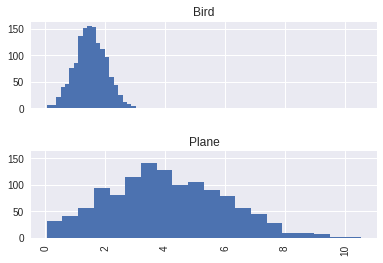

In [5]:
hist = radar.hist(column='Size', by='Type', bins=20, 
           sharex=True, sharey=True, layout=(2,1))

# Classification

The intuitive classifier is based on the question "What is the wingspan **threshold** for classification?". Obviously above some threshold we can confidently say it is a plane, but what is this threshold?

It is important to realize that the answer to this question is subjective, and is tightly connected to the **"business"** goals. For instance, in our radar example, the answer may change whether you are expecting an enemy attack, in which case you will not want to lose any plane, or you are suffering from accidents with birds.

In [ ]:
threshold = 2.4
colname = 'Threshold > {}'.format(threshold)

radar[colname] = radar.Size.map(lambda s: 'Bird' if s < threshold else 'Plane')

In [9]:
radar.sample(10)

,Type,Size,Threshold > 0.5,Threshold > 2.4
533,Plane,2.04,Plane,Bird
1269,Bird,2.05,Plane,Bird
875,Plane,6.50,Plane,Plane
585,Plane,2.79,Plane,Plane
110,Plane,7.36,Plane,Plane
1778,Bird,1.12,Plane,Bird
700,Plane,6.26,Plane,Plane
1548,Bird,2.13,Plane,Bird
594,Plane,2.12,Plane,Bird
2215,Bird,1.74,Plane,Bird


# Model assessment

## The Confusion Matrix

There are many measures for the quality of calssification models, but many of them are derived from a standard representation called **Confusion Matrix**. The general form of the confusion matrix, along with some of the common terms related to it, are summarized in the "cut and save" figure at the end of the chapter.

The [_sklearn.metrics_][1] module contains many measures for classification models, and specifically the ones that are related to the confusion matrix:

* **Accuracy** - Accuracy is the most intuitive measure of classification quality, and it describes what part of our classifications was correct, and it is calculated directly by the accuracy_score() function from the sklearn.metrics module.

* **Recall (Sensitivity), Precision & F1** - Precision and recall are measures of complementary business goals. **Precision** describes what fraction of the items the classifier flags as being in the class are actually in the class, and **recall** describes what fraction of the items in the class are detected by the classifier. It worth mentioning that in terms of the confusion matrix, precision deals with a single **column**, while recall deals with a single **row**, and both of them refer to a specific category, which is usually regarded as the **positive**. **F1** is a trade-off between the two.

[1]: http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics "metrics for classification models"

> **NOTE:** Accuracy has an important drawback which is its bad interpretation for unbalanced classes.

In [11]:
labels=['Bird', 'Plane']

for colname in radar.columns[2:]:
    print(colname)
    print(len(colname) * '-')
    cm = confusion_matrix(radar['Type'], radar[colname], labels=labels)
    print(pd.DataFrame(cm, index=labels, columns=labels))
    print('\nAccuracy: {}'.format(accuracy_score(radar['Type'], radar[colname])))
    print('Sensitivity: {}'.format(recall_score(radar['Type'], radar[colname], 
                                     pos_label='Plane')))
    print('Precision: {}'.format(precision_score(radar['Type'], radar[colname], 
                                     pos_label='Plane')))
    print('F1: {}\n\n'.format(f1_score(radar['Type'], radar[colname], 
                                       pos_label='Plane')))

Threshold > 0.5
---------------
       Bird  Plane
Bird     29   1326
Plane    28   1186

Accuracy: 0.4729466718567536
Sensitivity: 0.9769357495881383
Precision: 0.4721337579617834
F1: 0.6366076221148684


Threshold > 2.4
---------------
       Bird  Plane
Bird   1301     54
Plane   259    955

Accuracy: 0.8781627092253795
Sensitivity: 0.78665568369028
Precision: 0.9464816650148662
F1: 0.8591992802519117


